# Real Estate Price Prediction Project.

This data science project series walks through step by step process of how to build a real estate price prediction website. We will first build a model using sklearn and linear regression using banglore home prices dataset from kaggle.com.

Regression Problem : Price to be predicted.

## 1. Data loading and data cleaning.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

The last line matplotlib.rcParams["figure.figsize"]=(20,10) sets the default size of figures created by matplotlib to 20 inches in width and 10 inches in height.

In [2]:
df1 = pd.read_csv("/content/drive/MyDrive/Bengaluru_House_Data.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

decent enough dataset as ample number of sample points

In [4]:
df1.groupby('area_type')

In [5]:
df1.groupby('area_type')['area_type']

In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

This line of code is using the `groupby()` function in pandas to group the data in DataFrame `df1` by the values in the column 'area_type'. Then, it applies the `agg()` function to the grouped data to aggregate (or summarize) the counts of each group.

Here's a breakdown of what each part of the code does:

1. `df1.groupby('area_type')`: This part of the code groups the DataFrame `df1` by the unique values in the 'area_type' column. It creates a GroupBy object where each group corresponds to a unique value in the 'area_type' column.

2. `['area_type']`: This specifies the column on which the aggregation will be applied. Since we're interested in counting the occurrences of each group, we use the 'area_type' column again.

3. `.agg('count')`: This part of the code specifies the aggregation function to be applied to each group. In this case, it's the `'count'` function, which counts the number of occurrences of each value in the 'area_type' column within each group.

So, altogether, `df1.groupby('area_type')['area_type'].agg('count')` returns a Series object where the index contains the unique values in the 'area_type' column, and the corresponding values represent the count of occurrences of each unique value in the 'area_type' column in the original DataFrame `df1`.

Another responce

This line of code seems to be using the `groupby` function in Pandas, a popular Python library for data manipulation and analysis, to group data in a DataFrame (`df1`) by a column called 'area_type'. Then, it's applying the `agg` function to perform an aggregation operation, specifically counting the occurrences of each unique value in the 'area_type' column.

Let's break it down:

- `df1.groupby('area_type')`: This part groups the DataFrame `df1` by the values in the 'area_type' column. After this step, you'll have groups of rows where each group corresponds to a unique value in the 'area_type' column.

- `['area_type']`: This specifies the column on which the grouping is done. Essentially, it's saying "group the DataFrame by the values in the 'area_type' column".

- `.agg('count')`: This part specifies the aggregation function to be applied to each group. In this case, it's the `count` function, which counts the number of occurrences of each unique value within each group.

So, the overall effect of this line of code is to count how many times each unique value appears in the 'area_type' column of the DataFrame `df1`, and it returns a Series where the unique values are the index and the counts are the values.

**In short: kisi column me koi unique value kitni bar hai, just unka count output dene ke liye use this.**
`df.groupby('column_name')['column_name'].agg('count')`

In [7]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Dropping some columns to make the model simple

In [8]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [9]:
df2.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

see 1 BHK, 2 BHK, ... 4 BEDROOMS, 7 BEDROOMS etc many options are there and corresponding count of rooms can be seen in values section.

Data preprocessing starts with handling missing values

In [10]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Since we have 13k samples, large enough, NA tows are pretty small in numbers, so we can safely drop these rows.

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

No NA rows now.

Now column with String values : size column

In [12]:
df3.shape

(13246, 5)

In [13]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df3['size'].nunique()

31

4 BHK = 4 bedrooms + hall + kitchen

4 bedrooms = 4 bedrooms.

so 4 BHK == 4 bedrooms assume.

so adding a new column 'bhk' , which will have value of integer before bhk or bedroom

In [15]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) # x = 4 bhk, x.split(' ')[0] = 4, so df3['size'] column pr ye apply ho jayega, and corresponding integer value of number of bedrooms 'bhk' column me store ho jayegi.

<ipython-input-15-51c2ce1eeb57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) # x = 4 bhk, x.split(' ')[0] = 4, so df3['size'] column pr ye apply ho jayega, and corresponding integer value of number of bedrooms 'bhk' column me store ho jayegi.


In [16]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


Dekho kitni chalaki si split function use krke, string ka first element hmne le liya.

In [17]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [18]:
df3['bhk'].nunique()

19

In [19]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


2nd row looks like an error, as a room of just 2400/43 = 56 sqft ,, very less. Typical smallest bedroom size is 100sqft, and mostly it is 120 sqft.

In [20]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

'1133 - 1384'  esi bhi value hain, that is not an integer. Replace them by their average.

In [21]:
def is_float(x):
  try:
    float(x)
  except:  # if x is not an integer value, like range '1133 - 1384', then it will come in this except block
    return False # throughs exception
  return True  # if x is valid, float me badlna possible hai toh return True

In [22]:
df3[~( df3['total_sqft'].apply(is_float) ) ].head()

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


So integer na hokar, string type vali values mil jayengi ese. Nice Jugad.

In [23]:
df3[~df3['total_sqft'].apply(is_float)].shape

(190, 6)

So totla 190 rows me ese ranges ke form me hain.

Majority times data-scientist spend - is in data cleaning.

In [24]:
# writting python function which takes range as an input and return avg as output.
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0])+float(tokens[1]))/2
  try: # if number is normal integer, return as it is by converting into float
    return float(x)
  except: # try i.e. convertion in float is not possible = means aman_singh tyoe ka kuch hai, return None = nothing
    return None

In [25]:
convert_sqft_to_num('2311')

2311.0

In [26]:
convert_sqft_to_num('12-24')

18.0

In [27]:
convert_sqft_to_num('aman singh')

See returned nothing.

In [28]:
df4 = df3.copy()

In [29]:
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
# so 'total_sqft' column ki hr values pr convert_sqft_to_num functin apply ho jayega

In [30]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [31]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

'2100-2850' => 2475.0

## 2. Feature engineering and dimensionality reduction

In [32]:
df5 = df4.copy()

In [33]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft'] # x 1,00,000, since price was in lakhs

In [34]:
df5.head(3)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556


In [35]:
# let's first check kitne locations hain
df5.location.nunique()

1304

too many

In [36]:
len(df5.location.unique())

1304

k/a dimensionality curse.

In [37]:
# strip any extra spaces from the locations
df5.location = df5.location.apply(lambda x : x.strip()) # leading and enf=ding space hua to hta dega

In [38]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [39]:
location_stats = df5.groupby('location')['location'].agg('count')
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

So we can clearly see ki kai sari locations pr keval 1 data-row hain.

In [40]:
type(location_stats)

pandas.core.series.Series

So it is a pandas series.

In [41]:
location_stats = location_stats.sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

Clearly many locations have just 1 datapoints.

In [42]:
location_stats[location_stats<=10]
# this is also a pandas series. how to filter same as filtering data frame.

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [43]:
len(location_stats[location_stats<=10])

1052

So I can put all these location into a general category called 'other'

In [44]:
len(df5.location.unique())

1293

Total number of unique locations in my dataframe.

In [45]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [46]:
df5.location = df5.location.apply(lambda x: 'others' if x in location_stats_less_than_10 else x)

In [47]:
df5.location.nunique()

242

So now we have just 242 locations, integers me badlna easy hai inko.

This is pretty good, because when I later on convert them into one hot encoding, I will only have 242 columns, not 1293 columns.

## 3. Outliers Removal.

1. square_feet_per_bedroom, if it is less than some thresold, need to be removed that row. A typical sqft_per_bedrrom is 300 sqft.

In [48]:
df5[df5.total_sqft/df5.bhk < 300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,others,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,others,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [49]:
df5[df5.total_sqft/df5.bhk < 300].shape

(744, 7)

These are clearly data error or anomaly or outliers.

In [50]:
df6 = df5[~(df5.total_sqft / df5.bhk < 300)]
df6.shape

(12502, 7)

In [51]:
df6.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


This is just one way to remove outliers. There can be many more ways as well.

In [52]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

There may be outliers per location.

Task is to find out mean and std per location. So that filter out outliers per location.

In [55]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft > (m-st)) & (subdf.price_per_sqft <= (m+st))]
    df_out = pd.concat([df_out, reduced_df],ignore_index=True) # df pr df concatenation
  return df_out

In [56]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

so for each locations we have removed outliers from df6 dataframe, and stored the result in df7.

We removed close to 2000 outliers from the dataframe.

Kept only ( mean + - 1 std ) data

In [57]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


**Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like**

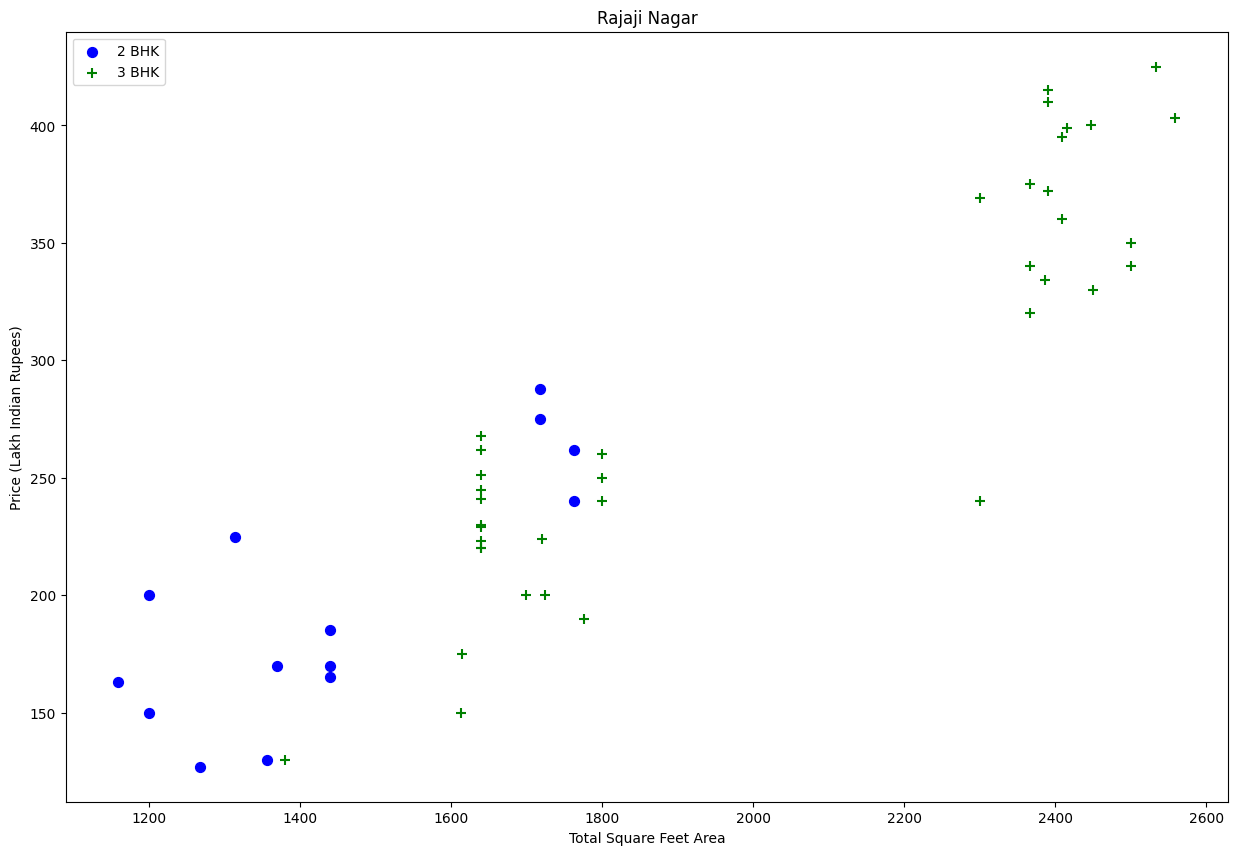

In [58]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

plot_scatter_chart(df7,"Rajaji Nagar")

There are some outliers here, where 2BHK prize is more than 3BHK

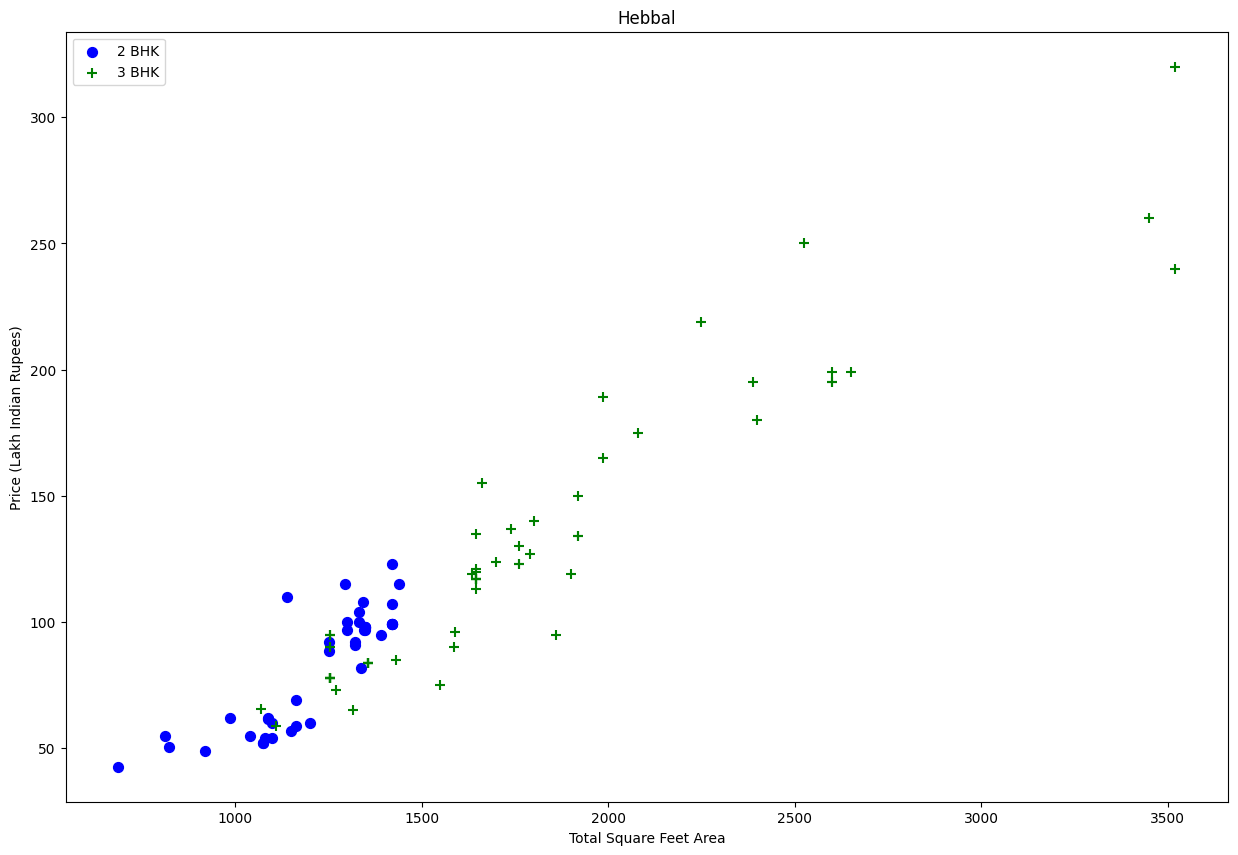

In [59]:
plot_scatter_chart(df7,"Hebbal")

Here also the same scenario.  There aremany cases where 2 bedroom prize is higher than 3.

So here also we want to do some data cleanup

Abhi tk, ek bhut low price and ek groupby krke, outliers removal kiya hai hmne.

**Ye vali filtering ka code samajh me nhi aaya**



We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

`{
  
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },

    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}`

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment


In [60]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

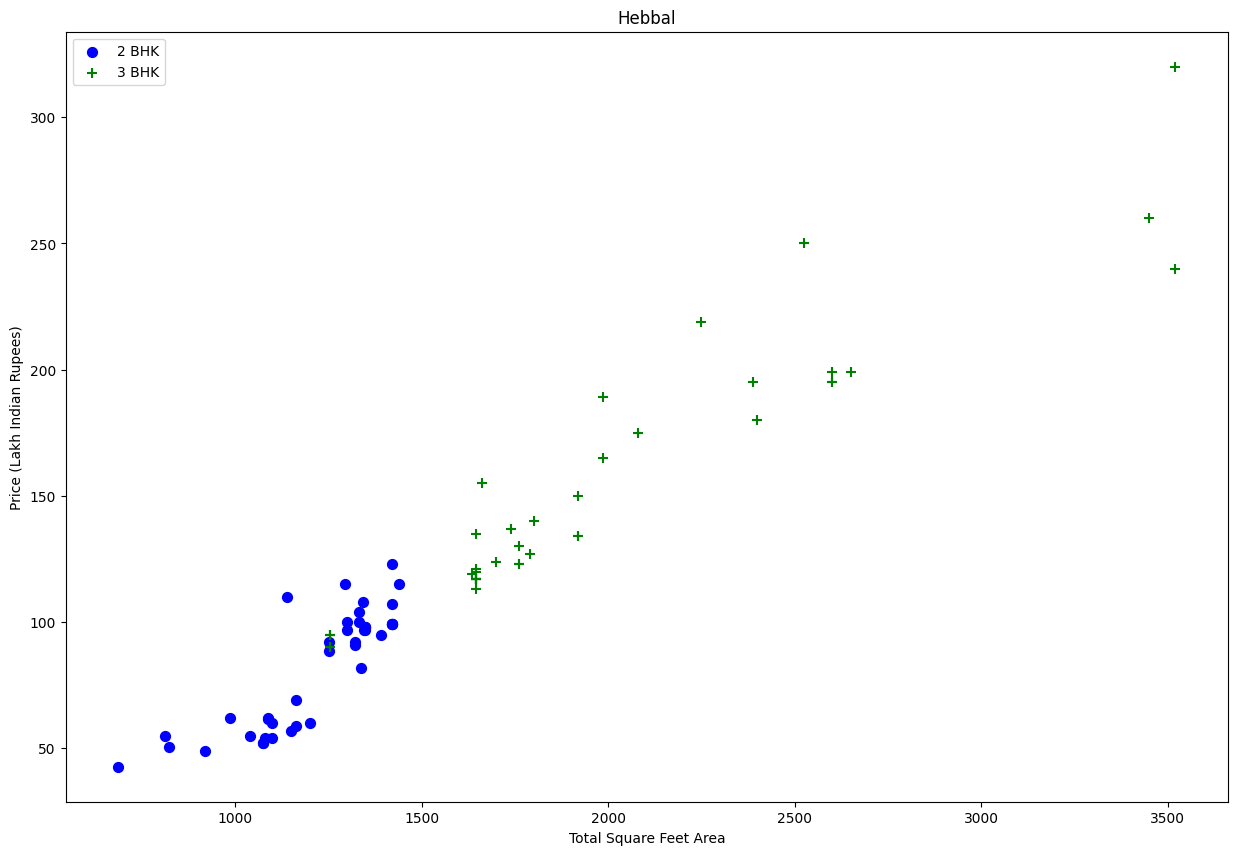

In [61]:
plot_scatter_chart(df8,"Hebbal")

See all the green data points are separated from blue datapoints now.

Based on above charts we can see that data points highlighted in red below are outliers and they are being removed due to remove_bhk_outliers function


**Before and after outlier removal: Rajaji Nagar**

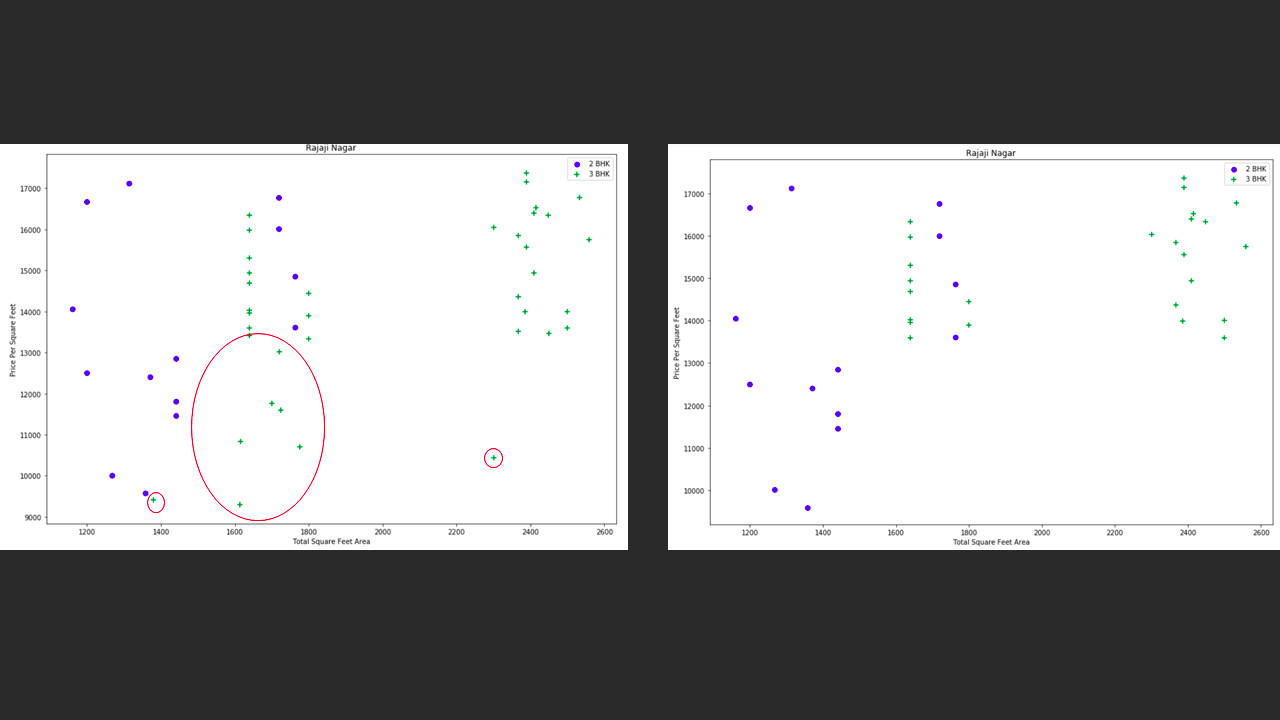

**Before and after outlier removal: Hebbal**

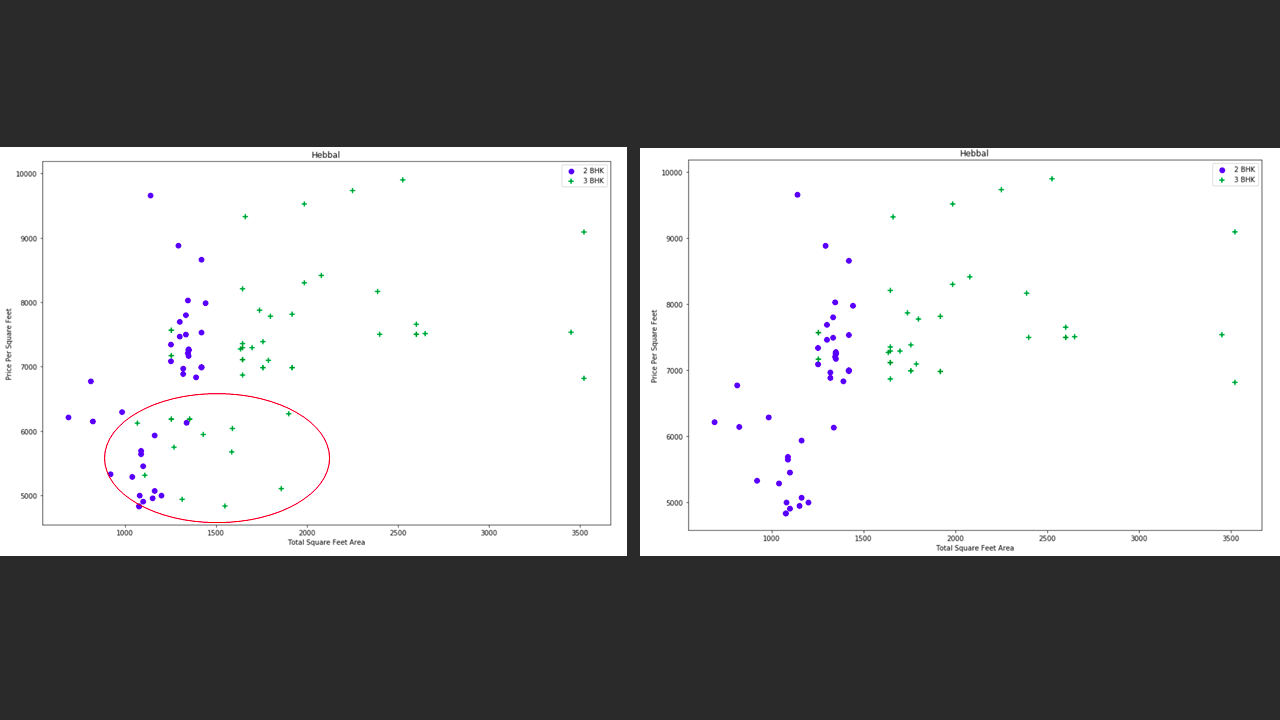Before and after outlier removal: Hebbal

Text(0, 0.5, 'Count')

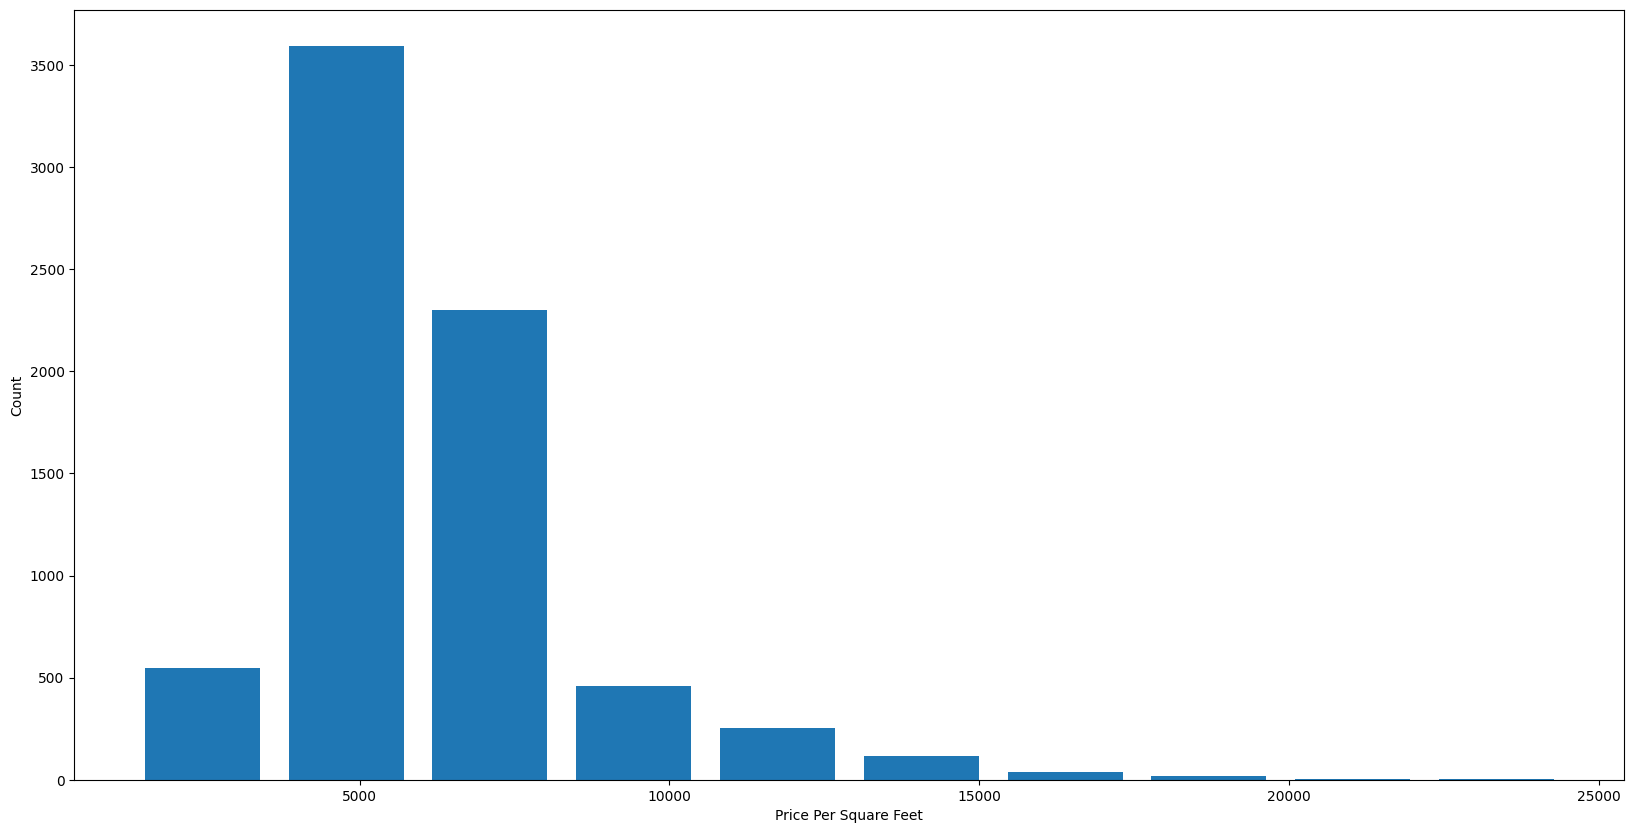

In [62]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

So kind of normal distribution.

# Outlier Removal Using Bathrooms Feature

In [63]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

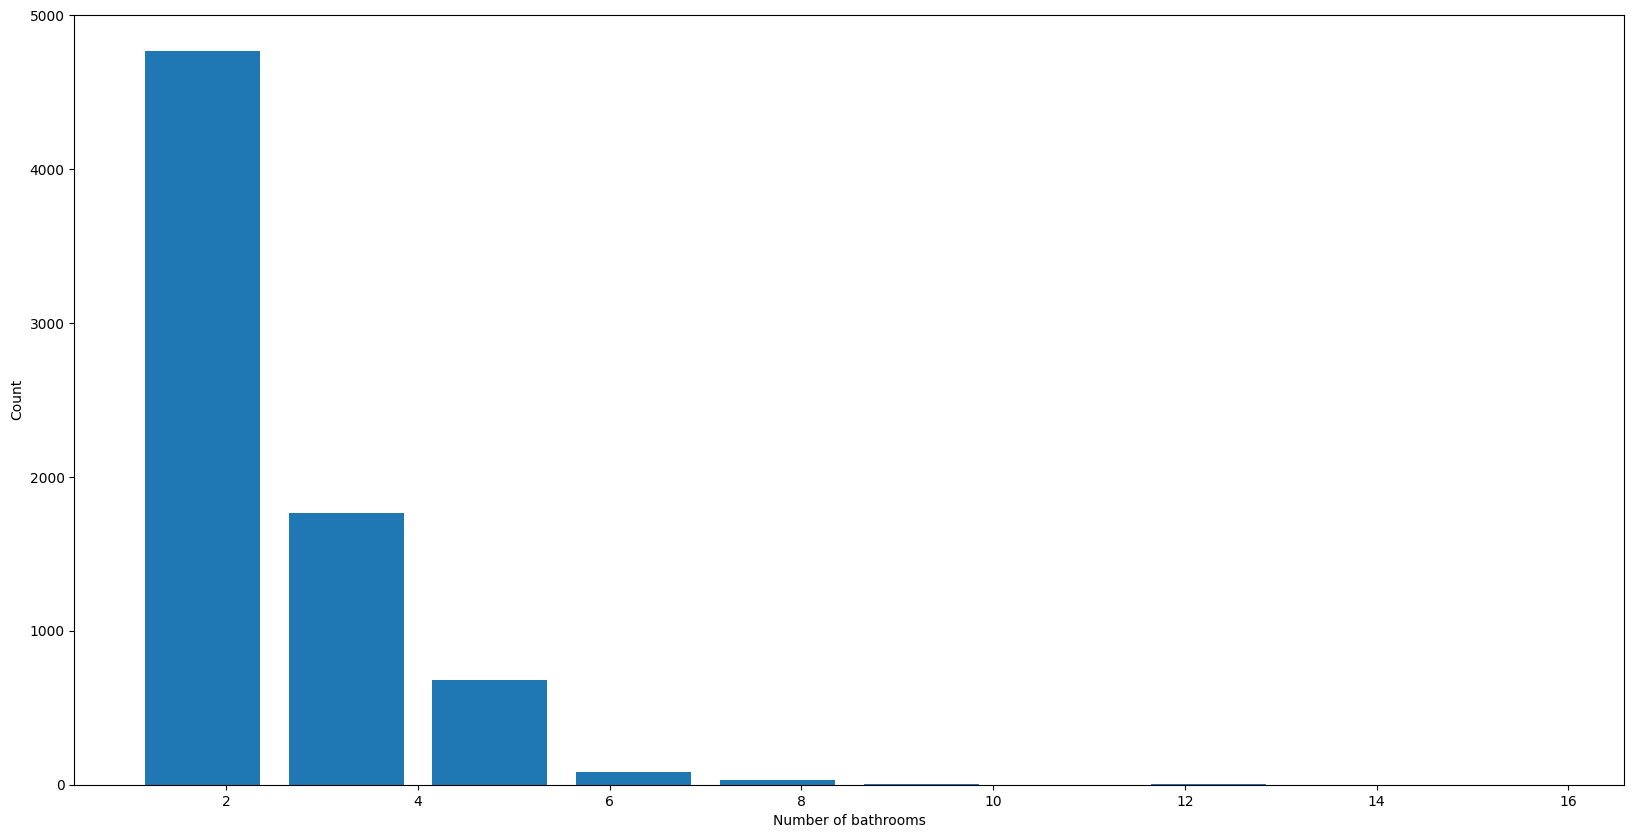

In [64]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [65]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,others,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,others,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,others,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,others,13 BHK,5425.0,13.0,275.0,13,5069.124424


It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [66]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,others,6 BHK,11338.0,9.0,1000.0,6,8819.897689


Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed

In [71]:
df9 = df8[df8.bath < df8.bhk+2] # assuming 1 extra guest ko de diya jayega.
df9.shape

(7251, 7)

In [72]:
df9.head(2)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491


In [73]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Final Step : Model Building.

In [74]:
df10.head(10)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,210.0,3


Location = string = > do one hot encoding.

In [75]:
pd.get_dummies(df10.location)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10233,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Don't worry, bad me true false apne aap 1, 0 ho jayega.

In [76]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,others
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [78]:
df11 = pd.concat([df10, dummies.drop('others',axis='columns')],axis = 'columns') # recall ki manual one-hot encoding me we need to drop one column, so maine other ko hi drop kr diya.
# Remember others ko drop toh kr diya, but uski jo data-frame me value thi, vo still alive hai. And ye drop hmare model ko aur accha banata hai, na ki girane ke.

In [79]:
df11.head(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


So all the location columns are dummy encoded.

In [80]:
df12 = df11.drop('location' , axis='columns')

In [81]:
df12

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,235.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,130.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,148.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10232,1200.0,2.0,70.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10233,1800.0,1.0,200.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10236,1353.0,2.0,110.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10237,812.0,1.0,26.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
# Convert boolean values to integers for columns from index 4 to the end
df12.iloc[:, 4:] = df12.iloc[:, 4:].astype(int)

In [83]:
df12.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df12.shape

(7251, 245)

In [85]:
X = df12.drop('price', axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
y = df12.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10232     70.0
10233    200.0
10236    110.0
10237     26.0
10240    400.0
Name: price, Length: 7251, dtype: float64

y is a pandas series, while X is pandas dataframe.

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [88]:
from sklearn.linear_model import LinearRegression

lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8452277697874376

Training and testing sb ho gyi, linear regression model ki.

We are going to first use k-folds cross validation to find out the optimum or best regression model for the dataset.

In [89]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0) # shufflesplit will randomize my data sample

cross_val_score(LinearRegression(), X, y, cv = cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

So actual test prediction score of our model will be avg of these 5 folds test scores'

Now trying out various models. Find out the best model using gridsearchcv

In [99]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# upar function me I will suplly X and y as input and this will tell me which algo is the best
# since we have provided algorithm as well as hyperparameters. So it will not only tell us the best model, but also the best parameters for the best model,
# this is called hyperparameters tuning.

In [102]:
find_best_model_using_gridseachcv(X, y)

ValueError: Invalid parameter 'normalize' for estimator LinearRegression(). Valid parameters are: ['copy_X', 'fit_intercept', 'n_jobs', 'positive'].

'normalize' parameter is no more available in sklearn Linear Regression.

In [104]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                 'n_jobs': [-1, 1, 2]  # Adjust the number of cores as needed
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

# upar function me I will suplly X and y as input and this will tell me which algo is the best
# since we have provided algorithm as well as hyperparameters. So it will not only tell us the best model, but also the best parameters for the best model,
# this is called hyperparameters tuning.

In [105]:
find_best_model_using_gridsearchcv(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

,model,best_score,best_params
0,linear_regression,0.818354,{'n_jobs': -1}
1,lasso,0.687474,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.779980,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


Winner is linear regression.

## Test the model for few properties

In [106]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [107]:
np.where(X.columns=="2nd Stage Nagarbhavi")[0][0]

6

See it has given the column index, of the inputted location.

In [109]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns)) # array of all '0' of size same as row size
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1 # set that index value to 1.

    return lr_clf.predict([x])[0]

In [110]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677206221

83 lakhs as estimated price.

In [111]:
predict_price('1st Phase JP Nagar',1000, 3, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395233001

In [112]:
predict_price('Indira Nagar',1000, 2, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.2781548400639

In [113]:
predict_price('Indira Nagar',1000, 3, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.5843020203317

In [115]:
predict_price('Indira Nagar',1000, 2, 3) # 3 bedrooms and 2 bathrooms., cost less than two 2 bed + 2 bath : because of our data-points are like this only

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.505277075825

## Export the tested model to a pickle file

In [116]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)


### Export location and column information to a file that will be useful later on in our prediction application

In [117]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))